# Class 7

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/game-data/game data.csv")

In [3]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [4]:
df.shape

(8, 5)

In [5]:
df.drop("Days",axis=1,inplace=True)

In [6]:
y = df["Wear Jacket?"]
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [7]:
x = df.drop("Wear Jacket?",axis=1)
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [8]:
#Encoding
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [9]:
le = LabelEncoder()

In [10]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
         x[col] = le.fit_transform(x[col])

In [11]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


#### sunny=1, cloudy=0
#### cold=0, warm=1
#### indoor=0, outdoor=1

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(x,y)

DecisionTreeClassifier()

In [15]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [16]:
clf.predict([[1,0,1]])

array(['Yes'], dtype=object)

In [17]:
clf.predict([[1,1,0]])

array(['No'], dtype=object)

In [18]:
clf.predict([[1,1,1]])

array(['No'], dtype=object)

In [19]:
from sklearn import tree
from matplotlib import pyplot as plt

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

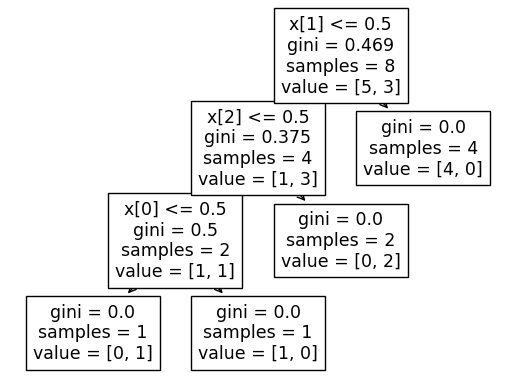

In [20]:
tree.plot_tree(clf)

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

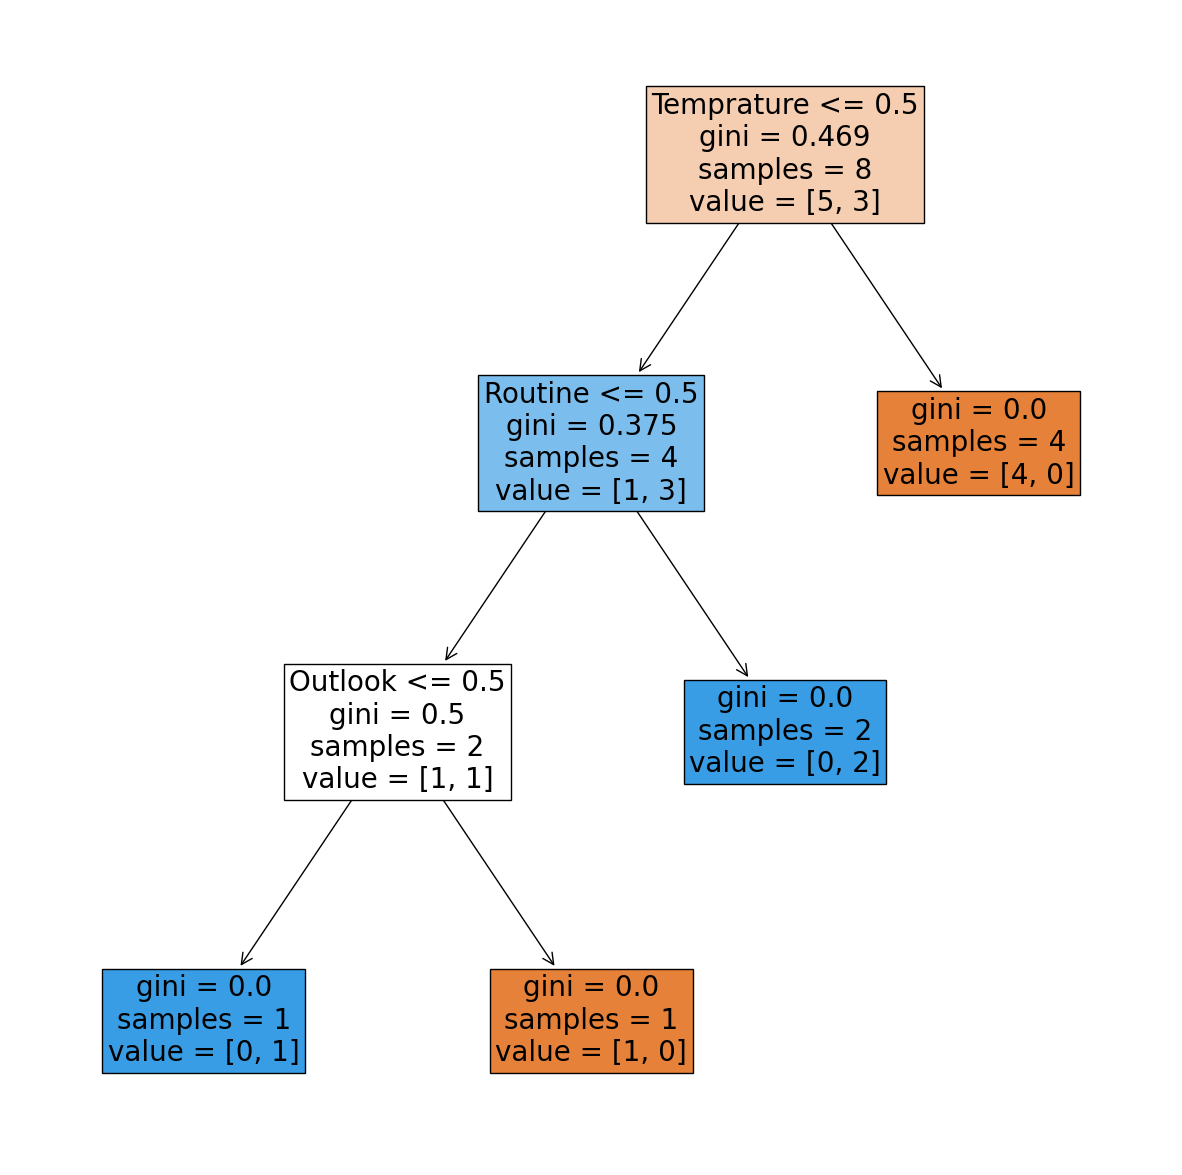

In [21]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=x.columns, filled=True, fontsize=20)